Another look at CODAR baroclinc tides, but focusing on the inclination and phase.

Comparing the baroclinic and barotropic ellipses.

Barotropic ellipses are found with the depth averaged currents. Depth averaging is performed over the entire water column.

Both barotropic and baroclinic were calcualted using a now cast time series Nov 26, 2014- April 26, 2015

In [1]:
import cmath
import datetime
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse
import numpy as np
import scipy.io as sio
import netCDF4 as nc

from salishsea_tools.nowcast import (research_VENUS)
from salishsea_tools import viz_tools

import baroclinic as bc

%matplotlib inline


# Load data

In [2]:
#baroclinic structure
data =sio.loadmat(
    '/ocean/nsoontie/MEOPAR/TidalEllipseData/CODAR/CODAR_region_baroclinic_20141126_20150426_masked.mat')
bc_struc = data['datastruc']
lats = bc_struc['lats'][0,0]
lons = bc_struc['lons'][0,0]

depths = bc_struc['depth'][0,0]

#bartropic structure
data= sio.loadmat(
    '/ocean/nsoontie/MEOPAR/TidalEllipseData/CODAR/CODAR_region_depav_20141126_20150426_masked.mat')
bt_struc = data['datastruc']

#full current - surface
data= sio.loadmat('/ocean/nsoontie/MEOPAR/TidalEllipseData/CODAR/CODAR_region_surface_20141126_20150426.mat')
surface_struc = data['datastruc']

grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
SITES = research_VENUS.SITES['VENUS']

# Full Ellipses

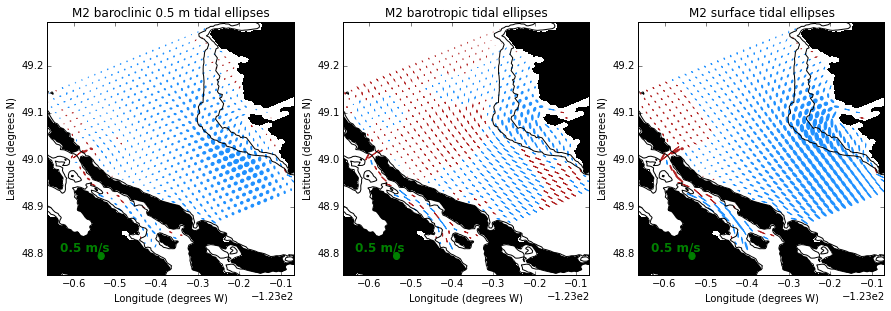

In [3]:
fig,axs = plt.subplots(1,3,figsize=(15,8))
const='M2'
sc=0.03
bc.plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, depths, grid, baroclinic=True, depth_level=0, scale=sc)
bc.plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, depths, grid, scale=sc, barotropic=True)
bc.plot_CODAR_ellipse(axs[2],lons, lats, const, surface_struc, depths, grid, scale=sc)
for ax in axs:
    bc.add_scale_ellipse(ax, lons[0,0]-.1,lats[0,0]-.01, scale = sc)
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.05, lats[-1,-1]+0.01])
    viz_tools.set_aspect(ax)

* Over the banks, the baroclinic ellipses are a lot smaller than the barotropic. Is that mostly because of the depth averaging? If the currents are primarily barotropic here, then ubc= u -udepav will be very small. But how can they be barotropic when this is where the river feeds into the domain? But it is also so shallow here. 

* Is the large increase in the baroclinic major/minor axis over the slopes an artifact of this depth averaging? Is it too shallow here to do the depth avergaing without ignoring the boundary layer? Then why don't we see very large currents on the northwest side of the slopes?

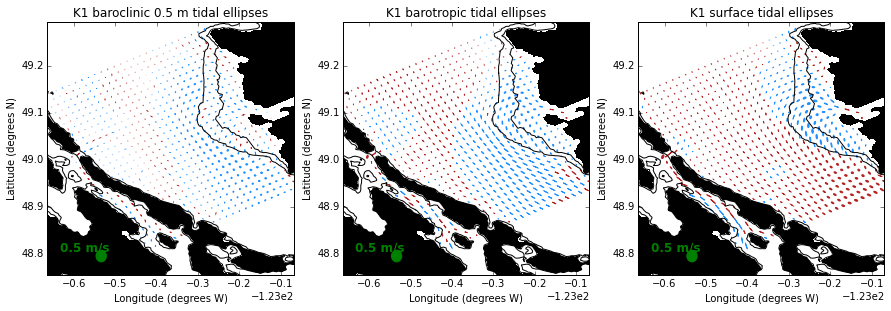

In [4]:
fig,axs = plt.subplots(1,3,figsize=(15,8))
const='K1'
sc=0.05
bc.plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, depths, grid, baroclinic=True, depth_level=0, scale=sc)
bc.plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, depths, grid,scale=sc, barotropic=True)
bc.plot_CODAR_ellipse(axs[2],lons, lats, const, surface_struc, depths, grid, scale=sc)
for ax in axs:
    bc.add_scale_ellipse(ax, lons[0,0]-.1,lats[0,0]-.01, scale = sc)
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.05, lats[-1,-1]+0.01])
    viz_tools.set_aspect(ax)

## M2 at 98m

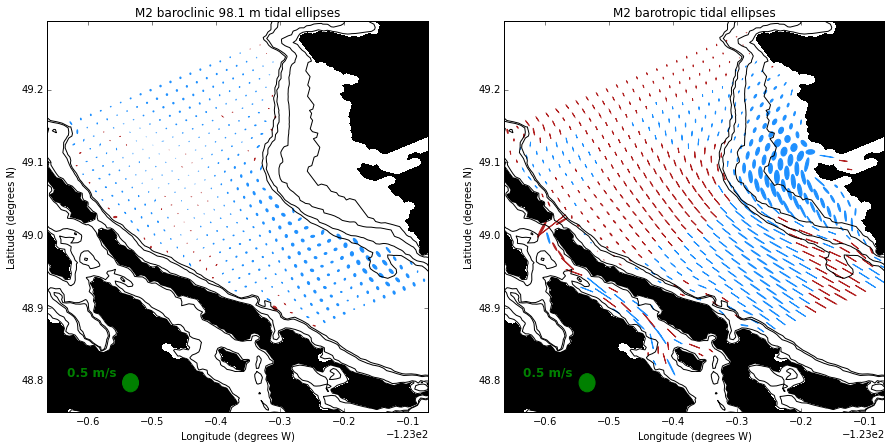

In [5]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
const='M2'
isobaths=[5,20,90, 110]
sc=0.05
bc.plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, depths, grid, 
                   baroclinic=True, depth_level=26, scale=sc, isobaths=isobaths)
bc.plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, depths, grid, scale=sc, isobaths=isobaths, barotropic=True)
for ax in axs:
    bc.add_scale_ellipse(ax, lons[0,0]-.1,lats[0,0]-.01, scale = sc)
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.05, lats[-1,-1]+0.01])
    viz_tools.set_aspect(ax)

## M2 147m

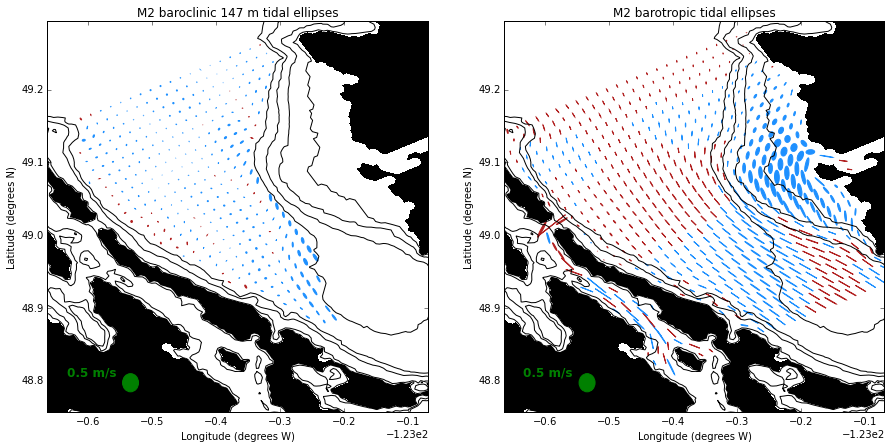

In [6]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
const='M2'
isobaths=[5,20,90, 140]
sc=0.05
bc.plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, depths, grid,
                      baroclinic=True, depth_level=28, scale=sc, isobaths=isobaths)
bc.plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, depths, grid, scale=sc, isobaths=isobaths, barotropic=True)
for ax in axs:
    bc.add_scale_ellipse(ax, lons[0,0]-.1,lats[0,0]-.01, scale = sc)
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.05, lats[-1,-1]+0.01])
    viz_tools.set_aspect(ax)

# Phase

An attempt at comparing the baroclinic and barotropic phase

In [7]:
def plot_phase(ax, lons, lats, const, datastruc, baroclinic=False, depth_level = 0, barotropic = False):
    """Plot the phase stored in a matalb datastruc"""
    major, minor, pha, inc = bc.get_constituent(const, datastruc)
    if baroclinic:
        pha = pha[:,:,depth_level]
        title_str = 'baroclinic {0:.3g} m'.format(depths[depth_level][0])
    elif barotropic:
        title_str = 'barotropic'
    else:
        title_str = 'surface'
        
    mesh=ax.pcolormesh(lons, lats, pha, vmin=0, vmax=360, cmap = 'hsv')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('Phase (deg wrt GMT)')
    
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.1, lats[-1,-1]+0.04])
    ax.set_ylabel('Latitude (degrees N)')
    ax.set_xlabel('Longitude (degrees W)')
    
    viz_tools.plot_land_mask(ax, grid, coords='map')
    viz_tools.plot_coastline(ax, grid, coords='map', isobath=5)
    viz_tools.plot_coastline(ax, grid, coords='map', isobath=20)
    viz_tools.set_aspect(ax)
    
    ax.set_title('{} {} phase'.format(const, title_str))

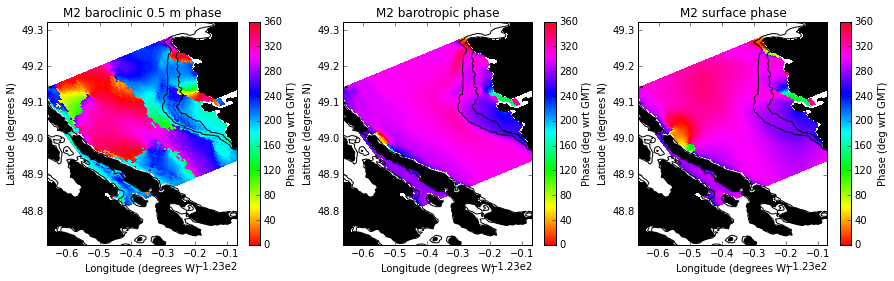

In [8]:
fig,axs = plt.subplots(1,3,figsize=(15,4))
const='M2'
plot_phase(axs[0],lons, lats, const, bc_struc, baroclinic=True, depth_level=0)
plot_phase(axs[1],lons, lats, const, bt_struc, barotropic = True)
plot_phase(axs[2],lons, lats, const, surface_struc)

The large baroclinic phase discontinuity (green area) is about 180 and results from a 180 deg shift in the inclination.  Over the banks, the baroclinic phase is delayed when compared to the baroptropic phase. But, the barotopic and baroclinic currents are also in very different directions.

Idea - rotate baroclinic ellipse onto the barotropic major/minor axis. Look at the phase aligned with the barotropic major axis.

Question - is it that our baroclinic and barotropic currents are in phase or that the baroclinic ellipses are just really circular and so are likely to interfere with the barotropic currents no matter what. The barotopic ellipses are mostly rectilinear. 


### Rotation

Given orthogonal velocity components $u=A_u\cos(\omega t - \phi_u)$ and $v=A_v\cos(\omega t - \phi_v)$, we can rotate our coordinate system clockwise by $\theta$ to define 

$\tilde{u} = u\cos\theta - v \sin\theta$

$\tilde{v} = u\sin\theta + v\cos\theta$.

Given we know $\phi_{u}, A_{u}, \phi_{v}, A_{v}$, we would like to find $\phi_{\tilde{u}}, A_{\tilde{u}}, \phi_{\tilde{v}}, A_{\tilde{v}} $ such that

$\tilde{u} = A_{\tilde{u}}\cos(\omega t - \phi_{\tilde{u}})$ and 

$\tilde{v} = A_{\tilde{v}}\cos(\omega t - \phi_{\tilde{v}})$.

The unknown quantities can be determined using complex algebra:

$A_{\tilde{u}}e^{i(\omega t - \phi_{\tilde{u}})}= A_ue^{i(\omega t - \phi_u)}\cos\theta- A_ve^{i(\omega t - \phi_v)}\sin\theta $

$A_{\tilde{v}}e^{i(\omega t - \phi_{\tilde{v}})}= +A_ue^{i(\omega t - \phi_u)}\sin\theta+ A_ve^{i(\omega t - \phi_v)}\cos\theta $,

leading to

$A_{\tilde{u}} = |  A_ue^{i\phi_u}\cos\theta - A_ve^{i\phi_v}\sin\theta |$

$\phi_{\tilde{u}} = arg(A_ue^{i\phi_u}\cos\theta - A_ve^{i\phi_v}\sin\theta)$

$A_{\tilde{v}} = |  A_ue^{i\phi_u}\sin\theta+ A_ve^{i\phi_v}\cos\theta |$

$\phi_{\tilde{v}} = arg(A_ue^{i\phi_u}\sin\theta+ A_ve^{i\phi_v}\cos\theta )$

This allows me to rotate the baroclinic ellipses onto the major axis of the barotropic ellipses. Then I can calculate the phase, etc for the baroclinic current aligned in the barotropic major axis.

Question - how do i deal with a negative minor axis? Does that matter? No, because $\cos(\theta +\pi) = -\cos(\theta)$

In [9]:
def rotate_baroclinc(bc_struc, bt_struc, const):
    """Rotate the baroclinic ellipse onto the barotropic major/minor axis"""
    
    major_bt, minor_bt, pha_bt, inc_bt = bc.get_constituent(const, bt_struc)
    major_bc, minor_bc, pha_bc, inc_bc = bc.get_constituent(const, bc_struc)
    
    # rotation angle is the difference between baroclinic and barotropic inclinations
    # construct complex representation of rotated velocities
    inc_diff = np.deg2rad(inc_bc -np.expand_dims(inc_bt,2))
    pha_bc = np.deg2rad(pha_bc)
    # Complex representation of the rotated major
    rotated_major_complex = (major_bc*np.cos(inc_diff)*np.exp(1j*pha_bc) -
                             minor_bc*np.sin(inc_diff)*np.exp(1j*(pha_bc+np.pi/2)))
    rotated_major_phase = np.angle(rotated_major_complex)
    rotated_major_amp = np.abs(rotated_major_complex)
    #C omplex representation of the rotated minor
    rotated_minor_complex = (major_bc*np.sin(inc_diff)*np.exp(1j*pha_bc) +
                             minor_bc*np.cos(inc_diff)*np.exp(1j*(pha_bc+np.pi/2)))
    rotated_minor_phase = np.angle(rotated_minor_complex)
    rotated_minor_amp = np.abs(rotated_minor_complex)
    # Conversion to degrees
    rotated_minor_phase = np.rad2deg(rotated_minor_phase)
    rotated_major_phase = np.rad2deg(rotated_major_phase)
    # Force phase between 0 and 360
    rotated_minor_phase=rotated_minor_phase + 360*(rotated_minor_phase<0)
    rotated_major_phase=rotated_major_phase + 360*(rotated_major_phase<0)
    
    return rotated_major_phase, rotated_major_amp, rotated_minor_phase, rotated_minor_amp

In [10]:
def plot_phase_difference(bt_struc, bc_struc, const, depth_level = 0):
    """plot the phase difference between barocinlc phase and barotopic. """
    # Calculate the phase difference
    major_bt, minor_bt, pha_bt, inc_bt = bc.get_constituent('M2', bt_struc)
    maj_pha, maj_amp, min_pha, min_amp  = rotate_baroclinc(bc_struc, bt_struc, 'M2')
    phase_diff = maj_pha[:,:,depth_level]-pha_bt
    phase_diff = phase_diff + 360*(phase_diff<0)
    
    #Plotting
    fig, ax=plt.subplots(1,1, figsize=(6,4))
    #Phase plot
    mesh = ax.pcolormesh(lons, lats, phase_diff,cmap='hsv',vmin=0,vmax=360)
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('Phase difference')
    viz_tools.plot_land_mask(ax,grid, coords='map')
    viz_tools.plot_coastline(ax,grid, coords='map', isobath=5)
    viz_tools.plot_coastline(ax,grid, coords='map', isobath=20)
    ax.plot(SITES['Central']['lon'], SITES['Central']['lat'], 'ks', label='Central')
    ax.plot(SITES['East']['lon'], SITES['East']['lat'], 'ko',label = 'East')
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.1, lats[-1,-1]+0.04])
    ax.set_title('Difference between rotated baroclinic \n{} phase and barotropic phase'.format(const))
    viz_tools.set_aspect(ax)
        
    return fig

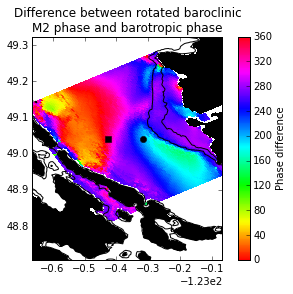

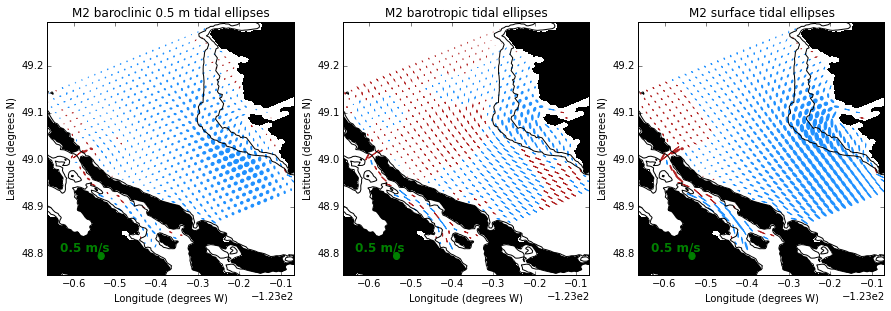

In [11]:
const = 'M2'
fig = plot_phase_difference(bt_struc, bc_struc, const)
fig, axs = plt.subplots(1,3,figsize=(15,8))
sc=0.03
bc.plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, depths, grid, baroclinic=True, depth_level=0, scale=sc)
bc.plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, depths, grid, scale=sc, barotropic=True)
bc.plot_CODAR_ellipse(axs[2],lons, lats, const, surface_struc, depths, grid, scale=sc)
for ax in axs:
    bc.add_scale_ellipse(ax, lons[0,0]-.1,lats[0,0]-.01, scale = sc)
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.05, lats[-1,-1]+0.01])
    viz_tools.set_aspect(ax)

What does it mean to ask if the baroclinic and barotopic currents are in/out of phase? Since the baroclinc and barotropic ellipses have a very different inclination, the ellipse phases are associated with currents in different directions. Rotating onto the barotropic major axis aligns our direction for comparison. Over the slopes and at east, the baroclinc current along the barotopic major axis is out of phase (~240) with the barotropic current. The baroclinic ellipses in these reigions are very circular.

It is interesting to ask if the timing of the max baroclinic current is linked with the timing of the max barotropic current, but we should keep in mind that even if these timings are in phase, the currents could be acting in different directions and so it is not trivial to conclude that they constructively/destructively interfere.  This is why I thought it would be informative to rotate onto the barotropic major axis. 

At east, the baroclinic is not really in phase with the barotropic (300 deg phase diff). At central, there is a ~120 phase difference. Somewhere between east and central, the barclinic and barotropic are in phase.

### Phase - Orientation

Now instead of looking at the phases, let's do two things


1. How are the currents oriented at the time of max barotropic current.
2. How are the currents oriented at the time of high tide at Point Atkinson (wrt a certain frequency like M2)


#### Currents at max barotopic tide

Draw the current vectors for all ellipses at the time of max barotopic current for each ellipse.

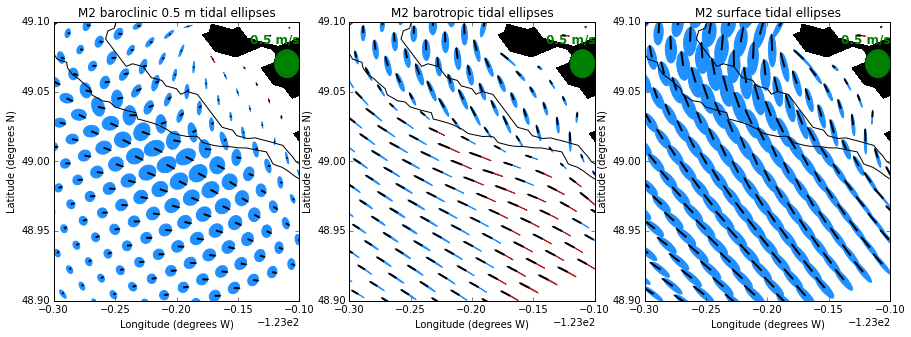

In [12]:
const= 'M2'
fig, axs = plt.subplots(1,3,figsize=(15,5))
sc_ell=0.04
st=3
sc_quiv = 8
_,_,pha,_ = bc.get_constituent(const, bt_struc)
time_deg =  pha #phase of barotropic
#baroclinc ellipses
bc.plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, depths, grid,
                     baroclinic=True, depth_level=0, scale=sc_ell, step=st)
bc.plot_ellipse_phase_arrow(axs[0], lons, lats, const, bc_struc, time_deg, baroclinic=True, depth_level=0, 
                         scale=sc_quiv, step=st)
#barotropic ellipses
bc.plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, depths, grid, scale=sc_ell, barotropic=True,step=st)
bc.plot_ellipse_phase_arrow(axs[1], lons, lats, const, bt_struc, time_deg, scale=sc_quiv, step=st)
#full surface current ellipses
bc.plot_CODAR_ellipse(axs[2],lons, lats, const, surface_struc, depths, grid, scale=sc_ell)
bc.plot_ellipse_phase_arrow(axs[2], lons, lats, const, surface_struc, time_deg, scale=sc_quiv, step=st)

for ax in axs:
    bc.add_scale_ellipse(ax, -123.11,49.07, dx=-.03, dy=0.015,scale = sc_ell)
    ax.set_ylim([48.9,49.1])
    ax.set_xlim([-123.3,-123.1])
    viz_tools.set_aspect(ax)

Does this make sense?
* barotropic currents are aligned with the barotropic major axis
* baroclinic currents are closely aligned with the baroclinic major axis. Remember, the phase of the barotropic and baroclinic are similar 
* baroclinic phase slightly lags over this area (above plots), which is consistent with current vector pointing left of major axis ( given clockwise roation).
* direction of baroclinic current is very different than the direction of the barotropic current. This at least matches my finding that the baroclinic current rotated to barotropic major axis mismatched in the phase, but I have to think more carefully about if the phase difference matches with what I am seeing. In the above plots (rotated to barotropic axis), baroclinic phase -barotropic_phase ~ 240,  meaning baroclinic lags the barotropic by 240 deg (or leads by 120 degs...). Here it looks like the baroclinc leads the barotropic.

#### Currents at time of high tide at Point Atkinson

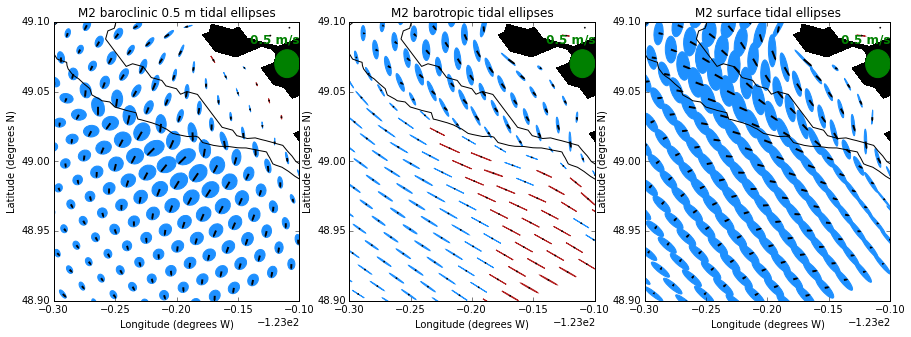

In [13]:
const= 'M2'
fig, axs = plt.subplots(1,3,figsize=(15,5))
sc_ell=0.04
st=3
sc_quiv = 8.5
##time_deg for high tide at Point Atkinson
time_deg = 31 #phase for M2 elevation at PA
#baroclinc
bc.plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, depths, grid, 
                   baroclinic=True, depth_level=0, scale=sc_ell, step=st)
bc.plot_ellipse_phase_arrow(axs[0], lons, lats, const, bc_struc, time_deg, baroclinic=True, depth_level=0, 
                         scale=sc_quiv, step=st)
#barotropic
bc.plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc,depths, grid, scale=sc_ell, barotropic=True, step=st)
bc.plot_ellipse_phase_arrow(axs[1], lons, lats, const, bt_struc, time_deg, scale=sc_quiv, step=st)
#full surface current
bc.plot_CODAR_ellipse(axs[2],lons, lats, const, surface_struc, depths, grid, scale=sc_ell)
bc.plot_ellipse_phase_arrow(axs[2], lons, lats, const, surface_struc, time_deg, scale=sc_quiv, step=st)

for ax in axs:
    bc.add_scale_ellipse(ax, -123.11,49.07, dx=-.03, dy=0.015,scale = sc_ell)
    ax.set_ylim([48.9,49.1])
    ax.set_xlim([-123.3,-123.1])
    viz_tools.set_aspect(ax)

Does this make sense?
* Barotopic currents are very small. I think this is reasonable because the ssh is a max and so currents should be close to a min.
* Baroclinic and surface currents have turned right when compared to above plot. Given the clockwise rotation, I think this is right. The max flood current leads the max ssh, so rightward turn for clockwise ellipses. 

#### Improvements
* Fewer, but bigger ellipses? Might be easier to see..

### Barotropic Flux

Plot barotropic ellipses but multiplied by the depth of the water column to look at barotropic flux.

In [14]:
def water_column_depth(mesh):
    """Determine the depth of the water column at each grid point. Make use of mesh mask."""
    
    e3t=mesh.variables['e3t'][0,:,:,:]
    tmask = mesh.variables['tmask'][0,:,:,:]
    
    
    water_depth = np.sum(e3t*tmask, axis=0)
    water_depth = np.ma.masked_values(water_depth, 0)
    
    return water_depth
    

In [15]:
mesh_mask=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
water_depth = water_column_depth(mesh_mask)


4.00004587908


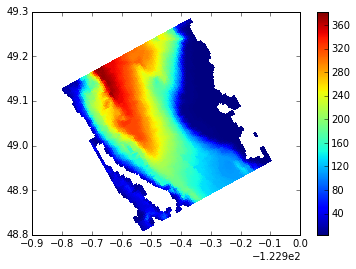

In [16]:
iss = 237; iee=321+1
jss=380; jee=461+1
plt.pcolormesh(lons, lats, water_depth[jss:jee,iss:iee].T)
plt.colorbar()
print(water_depth.min())

I'm getting 3m for the min water depth because the cell centres are at 0.5m and 3.5m. It would be better to use the nemo scale factors in both my water depth calculation and the depth average integral. I can get this from the mesh_mask.nc file. I will work towards improving the depth averaging calculations, but for now I will use a water depth consistent with what I have in the depth averaging.

In [17]:
def plot_barotopric_flux_ellipse(ax,lons, lats, const, bt_struc, bc_struc, mesh_mask,
                                 step=3, scale=0.08, isobaths=[5,20]):
    """Plot barotopic flux ellipses  (Hu, Hv) over the CODAR region, where H is water column depth.
    The H factor should change the amplitude of ellipses but not the inc or phase
    So just muliply major/minor by water column depth.
    Need bc_struc for the mask of depths.
    """
        
    major, minor, pha, inc = bc.get_constituent(const, bt_struc)
    title_str = 'barotropic flux'
    water_depth = water_column_depth(mesh_mask) 
    water_depth = water_depth[jss:jee,iss:iee].T
    
    for i in np.arange(0, lons.shape[-1], step):
        for j in np.arange(0, lats.shape[-1], step):
            if major[i,j]:
                bc.plot_ellipse(lons[i, j], lats[i, j], inc[i, j],
                             water_depth[i,j]*major[i, j],
                             water_depth[i,j]*minor[i, j], ax, scale)

    ax.set_title('{} {} tidal ellipses'.format(const, title_str))

    ax.set_ylabel('Latitude (degrees N)')
    ax.set_xlabel('Longitude (degrees W)')

    viz_tools.plot_land_mask(ax, grid, coords='map')
    for isobath in isobaths:
        viz_tools.plot_coastline(ax, grid, coords='map', isobath=isobath)

NameError: name 'mesh' is not defined

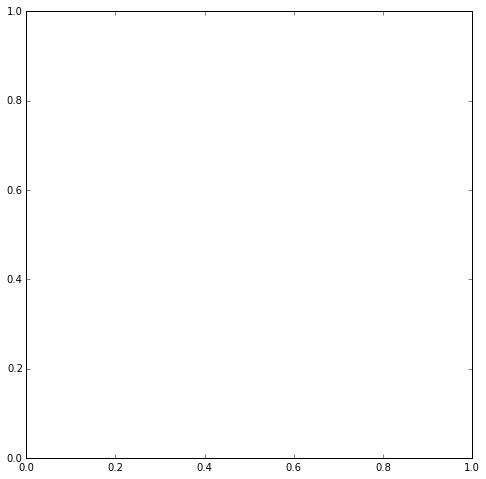

In [18]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
sc=0.0005
st=3
plot_barotopric_flux_ellipse(ax,lons, lats, const, bt_struc, bc_struc, mesh,step=st, scale=sc)
"""Add scale ellipse"""
ell = Ellipse(xy=(-123.15, 49.2),width = sc*10, height = sc*10, angle = 45,
                  color='g')
ax.add_artist(ell)
textscale = ax.text(-123.18, 49.22, '10 m^2/s', color='g', fontsize=12, fontweight='heavy')

#depth for reference
mesh = ax.pcolormesh(lons, lats, water_depth[jss:jee,iss:iee].T, cmap='gray_r')
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Water depth [m]')
ax.set_ylim([48.8,49.3])
ax.set_xlim([-123.5,-123.1])
viz_tools.set_aspect(ax)


The variation in depth is choppy. Yet another reason to use the mesh_mask scale factors...

No water depth

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
sc=0.0005
st=3
plot_barotopric_flux_ellipse(ax,lons, lats, const, bt_struc, bc_struc, mesh_mask,step=st, scale=sc)
"""Add scale ellipse"""
ell = Ellipse(xy=(-123.15, 49.2),width = sc*10, height = sc*10, angle = 45,
                  color='g')
ax.add_artist(ell)
textscale = ax.text(-123.18, 49.22, '10 m^2/s', color='g', fontsize=12, fontweight='heavy')

ax.set_ylim([48.8,49.3])
ax.set_xlim([-123.5,-123.1])
viz_tools.set_aspect(ax)